In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('~/xbyrne.mplstyle')
from matplotlib import cm, colors, ticker
import myutils
from chempy import Substance

## Venus Altitudinal Composition

In [2]:
venus_structure = pd.read_csv('./GGchem/structures/VenusSurfaceExtrapFit.dat',
                              delim_whitespace=True,
                              index_col=0)[1:].set_index('z[km]')
max_alt_km = 12
venus_structure = venus_structure[venus_structure.index<max_alt_km]

df = myutils.gather_GGchem_results(results_file='./venus_results/surface_results.dat')
cond_df = 10**df[[col for col in df.columns
              if col[0]=='n' and col!='nHtot']]
cond_mr_df = cond_df.div(cond_df.sum(axis=1), axis=0)

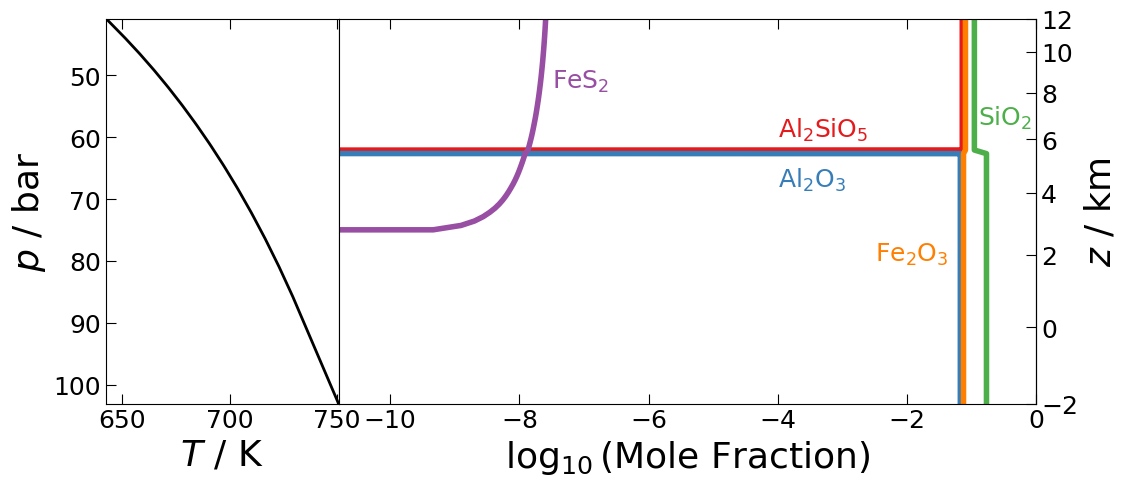

In [11]:
fg, axs = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'wspace':0, 'width_ratios':[1,3]})
ax=axs[0]
ax.plot(df.T_K, df.p_bar, c='k', lw=2)
ax.set_xlim(df.T_K.min(), df.T_K.max())
ax.set_ylim(df.p_bar.max(), df.p_bar.min())
ax.set_xlabel(r'$T$ / K')
ax.set_ylabel(r'$p$ / bar')
ax.set_yticks([100,90,80,70,60,50])
ax.tick_params(right=False)
# Secondary axis
def ptoz(p):
    return np.interp(p, venus_structure['P[bar]'][::-1], venus_structure.index[::-1])
def ztop(z):
    return np.interp(z, venus_structure.index, venus_structure['P[bar]'])

ax = axs[1]
selected_condensates = ['Al2SiO5','Al2O3','SiO2','FeS2','Fe2O3']
cols = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
coords = []
for i, (condensate, col, xy) in enumerate(
    zip(selected_condensates, cols,
        [[-4,60],[-4,68],[-.9,58],[-7.5,52],[-2.5,80]])
):
    ax.plot(
        np.log10(cond_mr_df[f'n{condensate}']), df.p_bar,
        lw=4, c=col
    )
    ax.annotate(
        myutils.chemlatex(condensate),
        xy=xy, c=col
    )
ax.set_xlabel(r'$\log_{10}$(Mole Fraction)')
ax.set_xlim(-10.8,0)
ax.set_ylim(df.p_bar.max(), df.p_bar.min())
ax.set_yticks([])


ax2 = ax.secondary_yaxis('right', functions = (ptoz, ztop))
ax2.set_ylabel(r'$z$ / km')
ax2.set_yticks([-2,0,2,4,6,8,10,12])
ax.tick_params(left=True)

fg.savefig('figures/venus_altitude_abundances.eps',format='eps', bbox_inches='tight')

## Galleries
### Minerals

In [202]:
venus_file = '/data/ajnb3/results/grid/grid_output.dat'
venus_df = myutils.gather_GGchem_results(results_file = venus_file)
T_K = myutils.squarsh(venus_df, 'T_K')
p_bar = myutils.squarsh(venus_df, 'p_bar')
cond_cm3_df = 10**venus_df[
    [col for col in venus_df.columns
     if col[0]=='n' and col!='nHtot']
].rename(columns=lambda col:col[1:])
cond_mf_df = cond_cm3_df.div(cond_cm3_df.sum(axis=1), axis=0)
cond_mf_df.head()

,Al2O3,MgAl2O4,TiO2,Mg2SiO4,MgSiO3,MgSiO3[l],MgTi2O5,MgTi2O5[l],SiO2,SiO2[l],...,Mn3Al2Si3O12,Mg3Si4O12H2,MnTiO3,CaSO4,MgCO3,Fe2TiO4,MgFe2O4,Fe2O3,Fe3O4,MgF2
0,1.158301e-307,1.158301e-307,0.003771,1.158301e-307,0.429667,1.158301e-307,1.158301e-307,1.158301e-307,0.110967,1.158301e-307,...,0.000991,1.158301e-307,1.158301e-307,0.088406,1.158301e-307,1.158301e-307,1.158301e-307,0.080696,1.158301e-307,1.158301e-307
1,1.158301e-307,1.158301e-307,0.003771,1.158301e-307,0.429667,1.158301e-307,1.158301e-307,1.158301e-307,0.110967,1.158301e-307,...,0.000991,1.158301e-307,1.158301e-307,0.088406,1.158301e-307,1.158301e-307,1.158301e-307,0.080696,1.158301e-307,1.158301e-307
2,1.158301e-307,1.158301e-307,0.003771,1.158301e-307,0.429667,1.158301e-307,1.158301e-307,1.158301e-307,0.110967,1.158301e-307,...,0.000991,1.158301e-307,1.158301e-307,0.088406,1.158301e-307,1.158301e-307,1.158301e-307,0.080696,1.158301e-307,1.158301e-307
3,1.158301e-307,1.158301e-307,0.003771,1.158301e-307,0.429667,1.158301e-307,1.158301e-307,1.158301e-307,0.110967,1.158301e-307,...,0.000991,1.158301e-307,1.158301e-307,0.088406,1.158301e-307,1.158301e-307,1.158301e-307,0.080696,1.158301e-307,1.158301e-307
4,1.158301e-307,1.158301e-307,0.003771,1.158301e-307,0.429667,1.158301e-307,1.158301e-307,1.158301e-307,0.110967,1.158301e-307,...,0.000991,1.158301e-307,1.158301e-307,0.088406,1.158301e-307,1.158301e-307,1.158301e-307,0.080696,1.158301e-307,1.158301e-307


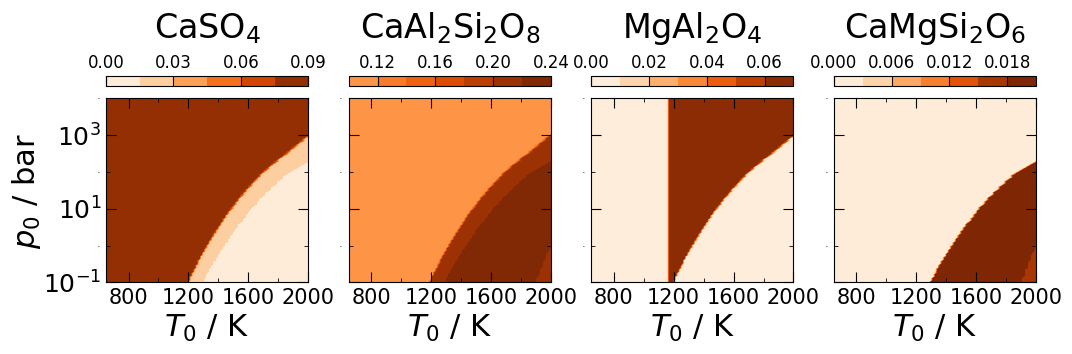

In [203]:
mpl.style.use('~/xbyrne.mplstyle')
fg, axs = plt.subplots(1,4, figsize=(12,3),
                       gridspec_kw={'wspace':.2}
                       )
gallerands = [
   # 'MgSiO3','SiO2',
   'CaSO4','CaAl2Si2O8','MgAl2O4','CaMgSi2O6',
]
nbs = [
   # 3,4,
   3,4,4,4]
lvls = [
   # 7,6,
   5,6,6,6]
for i, (ax, gallerand, nb, lvl) in enumerate(zip(axs.ravel(), gallerands, nbs, lvls)):
   mf = myutils.squarsh(cond_mf_df, gallerand)
   if gallerand+'[l]' in cond_mf_df.columns:
      mf += myutils.squarsh(cond_mf_df, gallerand+'[l]')
   ax.set_title(myutils.chemlatex(gallerand), y=1.28, fontsize=24)
   ax.set_xticks([800,1200,1600,2000])
   ax.set_xticks([1000,1400,1800], minor=True)
   ax.set_yscale('log')
   ax.set_yticks([1,1e2,1e4], minor=True)
   ax.tick_params(axis='both', which='minor', direction='in',
                  labelsize=0, size=3,
                  top=True, right=True)
   contf = ax.contourf(
      T_K, p_bar, mf,
      vmin=0, vmax=np.max(mf),
      levels=lvl, cmap=cm.Oranges
   )
   cbar = fg.colorbar(contf, ax=ax, location='top')
   cbar.locator = ticker.MaxNLocator(nbins=nb)
   cbar.update_ticks()
   cbar.ax.tick_params(labelsize=12)
   if i!=0:
      ax.set_yticklabels([])
   else:
      ax.set_ylabel(r'$p_0$ / bar', labelpad=0, fontsize=22)
   ax.set_xlabel(r'$T_0$ / K', fontsize=22)
   ax.tick_params(axis='x', which='major', labelsize=15)

fg.savefig('figures/mineral_gallery.eps',format='eps',bbox_inches='tight')

### Gases

In [204]:
gas_cm3_df = 10**venus_df[
    [col for col in venus_df.columns
     if col[0]!='n' and col not in ['T_K','p_bar']]
]
vmr_df = gas_cm3_df.div(gas_cm3_df.sum(axis=1), axis=0)
vmr_df.head()

,H,C,N,O,F,S,Cl,Fe,Mn,Si,...,TiC,Si(CH3)4,SiCH3Cl3,SiH2,SiH3,TiC2,C3H,MnS,Si2C2,TiC4
0,4.211026e-20,3.028866e-59,7.336200e-36,5.245427e-28,1.534096e-26,2.781552e-21,2.216384e-16,3.724499e-34,5.242455e-34,5.313386e-69,...,9.761349e-97,5.113779e-149,1.257054e-75,4.049278e-71,5.096030e-69,9.498205e-112,4.210233e-71,1.151435e-37,5.020903e-144,1.358012e-145
1,5.653605e-20,5.733778e-59,1.977903e-35,2.059933e-27,3.797095e-26,1.718039e-21,4.109706e-16,5.884086e-34,9.873244e-34,1.680899e-68,...,2.163925e-96,1.456234e-151,3.755399e-76,6.197579e-71,5.076778e-69,1.041303e-111,8.378265e-72,7.239678e-38,5.547972e-144,3.926987e-146
2,7.567751e-20,1.078496e-58,5.273667e-35,7.963289e-27,9.301383e-26,1.067795e-21,7.566410e-16,9.250887e-34,1.846598e-33,5.251828e-68,...,4.760068e-96,4.457137e-154,1.138151e-76,9.450740e-71,5.064731e-69,1.142849e-111,1.702589e-72,4.580964e-38,6.140683e-144,1.155974e-146
3,1.010021e-19,2.015859e-58,1.390748e-34,3.030873e-26,2.255212e-25,6.677942e-22,1.383289e-15,1.447489e-33,3.430149e-33,1.620892e-67,...,1.039183e-95,1.465508e-156,3.499003e-77,1.435986e-70,5.060073e-69,1.255792e-111,3.532809e-73,2.917078e-38,6.808998e-144,3.463865e-147
4,1.344108e-19,3.744640e-58,3.627988e-34,1.135921e-25,5.412751e-25,4.202268e-22,2.511371e-15,2.254273e-33,6.328789e-33,4.942482e-67,...,2.251865e-95,5.173446e-159,1.091050e-77,2.174259e-70,5.062959e-69,1.381645e-111,7.483839e-74,1.869318e-38,7.564430e-144,1.056516e-147


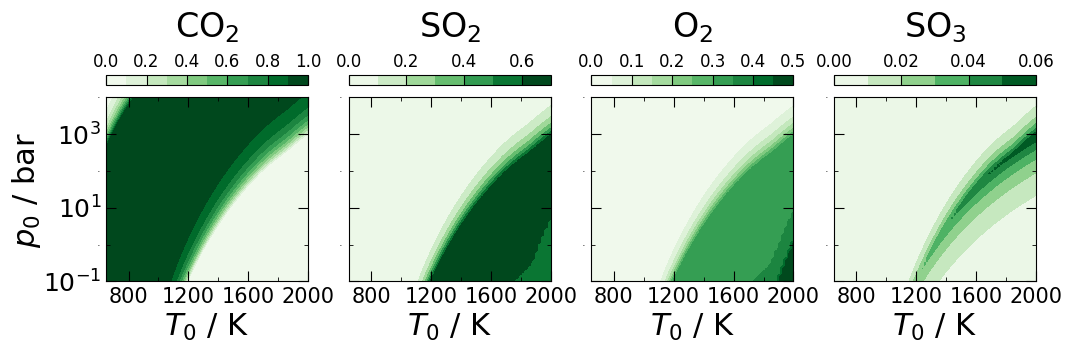

In [206]:
fg, axs = plt.subplots(1,4, figsize=(12,3),
                       gridspec_kw={'wspace':.2}
                       )
gallerands = [
   'CO2','SO2','O2','SO3'
]
nbs = [6,4,6,3]
lvls = [10,7,10,6]
for i, (ax, gallerand, nb, lvl) in enumerate(zip(axs, gallerands, nbs, lvls)):
   vmr = myutils.squarsh(vmr_df, gallerand)
   ax.set_title(myutils.chemlatex(gallerand), y=1.28, fontsize=24)
   ax.set_xticks([800,1200,1600,2000])
   ax.set_xticks([1000,1400,1800], minor=True)
   ax.set_yscale('log')
   ax.set_yticks([1,1e2,1e4], minor=True)
   ax.tick_params(axis='both', which='minor', direction='in',
                  labelsize=0, size=3,
                  top=True, right=True)
   contf = ax.contourf(
      T_K, p_bar, vmr,
      vmin=0, vmax=np.max(vmr),
      levels=lvl, cmap=cm.Greens
   )
   cbar = fg.colorbar(contf, ax=ax, location='top')
   cbar.locator = ticker.MaxNLocator(nbins=nb)
   cbar.update_ticks()
   cbar.ax.tick_params(labelsize=12)
   if i!=0:
      ax.set_yticklabels([])
   else:
      ax.set_ylabel(r'$p_0$ / bar', labelpad=0, fontsize=22)
   ax.set_xlabel(r'$T_0$ / K', fontsize=22)
   ax.tick_params(axis='x', which='major', labelsize=15)

fg.savefig('figures/gas_gallery.eps',format='eps',bbox_inches='tight')

## Transect Spectra

In [208]:
venus_df = pd.read_csv('/data/ajnb3/results/summer/venus_grid.csv', index_col=0)
spectra_df = pd.read_csv('/data/ajnb3/results/summer/spectra_1400.csv', index_col=0)[40:]
transect_df = pd.read_csv('/data/ajnb3/results/summer/venus_1400.csv', index_col=0)

wavelengths_um = spectra_df.columns.to_numpy(dtype=float)
spectra_RRJ = spectra_df.to_numpy()

def annotate_peak(fg, wlen, y, molecule, dy=0.001, above=True):
    ax = fg.axes[0]
    if above==False:
        dy=-dy
    ax.annotate(myutils.chemlatex(molecule), [wlen,y], xytext=[wlen, y+dy], horizontalalignment='center',
            arrowprops={'arrowstyle':'-'}, fontsize=22)

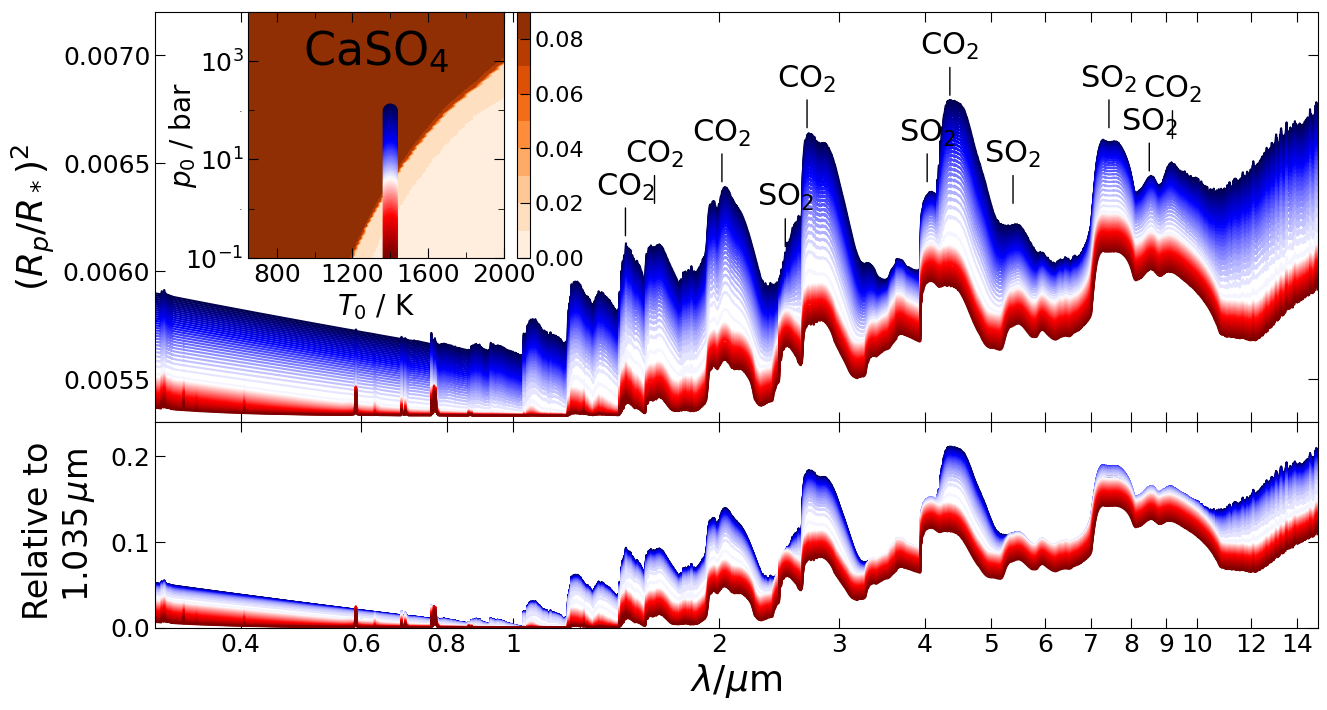

In [222]:
cols = mpl.cm.seismic(np.linspace(0,1, len(spectra_RRJ)))
Rs_RJ = 1.187 # R_TRAPPIST_1 / R_Jupiter
spectra_RRS2 = (spectra_RRJ/Rs_RJ)**2 # (R/R*)^2

fg, axs = plt.subplots(
    2,1, figsize=(15,8), sharex=True,
    gridspec_kw={
        'height_ratios':[2,1],
        'hspace':0
    },
)
ax = axs[0]
ax.set_xlim([0.3, 15])
ax.set_xscale("log")
xtix = [0.4, 0.6, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14]
ax.set_xticks(xtix)
ax.set_xticklabels(xtix)
ax.set_ylabel(r"$(R_p/R_*)^2$")

for spectrum, col in zip(spectra_RRS2, cols):
    ax.plot(wavelengths_um, spectrum, c=col)

insax = ax.inset_axes([.08,.4,.22,.6])
T_K = myutils.squarsh(venus_df, 'T_K')
p_bar = myutils.squarsh(venus_df, 'p_bar')
contf = insax.contourf(
    T_K, p_bar,
    myutils.squarsh(venus_df, 'nCaSO4'),
    cmap=cm.Oranges,
    levels=10
)
insax.scatter(transect_df.T_K.loc[spectra_df.index], transect_df.p_bar.loc[spectra_df.index], c=cols, s=100)
insax.set_title(myutils.chemlatex('CaSO4'),y=.75, fontsize=33)
insax.set_xticks([800,1200,1600,2000])
insax.set_xticks([1000,1400,1800], minor=True)
insax.set_yscale('log')
insax.set_yticks([1,1e2,1e4], minor=True)
insax.set_xlabel('$T_0$ / K', fontsize=20)
insax.set_ylabel('$p_0$ / bar', labelpad=-10, fontsize=20)
insax.tick_params(axis='both', which='minor', direction='in',
                  labelsize=0, size=4,
                  top=True, right=True)

cax = insax.inset_axes([1.05,0,.05,1])
cbar = fg.colorbar(
    contf,
    cax=cax,
    ticks=np.linspace(0.,.08,5),
)
cax.tick_params(labelsize=16)

ax.set_ylim([.0053,.0072])
ax.set_yticks([.0055,.006,.0065,.007])
ax.tick_params(axis='both', which='minor', size=0)

ax = axs[1]
norm = spectra_RRS2[:,1238]
for spectrum, col in zip(((spectra_RRS2.T-norm) / norm).T, cols):
    ax.plot(wavelengths_um, spectrum, c=col)
ax.set_xlabel(r"$\lambda/\mu$m")
ax.set_ylabel("Relative to \n$1.035\,\mu$m", fontsize=24, labelpad=10)
ax.tick_params(axis='both', which='minor', size=0)
ax.set_ylim(0,.24)

for wlen, h, lbl in zip(
    [1.46, 1.61, 2.02, 2.5, 2.69, 4.03, 4.35, 5.38, 7.43, 8.51, 9.2],
    # [.0919,.0935,.0935,.092,.0953,.0954,.097,.0928,.0962, .0952, .0965],
    [.00615,.0063,.0064,.0061,.00665,.0064,.0068,.0063,.00665,.00645,.0066],
    ['CO2','CO2','CO2','SO2','CO2','SO2','CO2','SO2','SO2','SO2','CO2']
):
    axs[0].annotate(myutils.chemlatex(lbl), [wlen,h], xytext=[wlen, h+0.0002], horizontalalignment='center',
                arrowprops={'arrowstyle':'-'}, fontsize=22)

fg.savefig('figures/transect_homoiso_annot.eps', format='eps', bbox_inches='tight')

## Changes in the Boundary with Composition

### Ca

In [2]:
data_folder = '/data/ajnb3/results/summer/Ca_O_lines'
csv_files = os.listdir(data_folder)
dfs = [pd.read_csv(f'{data_folder}/{csv_file}')
       for csv_file in csv_files]
CaO_massfracs = [myutils.CaO_mass_fraction(df).mean() for df in dfs]
dfs = [df for df, CaO_massfrac in zip(dfs, CaO_massfracs)
       if .03<CaO_massfrac<.13]
CaO_massfracs = [CaO_massfrac for CaO_massfrac in CaO_massfracs
                 if .03<CaO_massfrac<.13]
venus_df = pd.read_csv(f'{data_folder}/../venus_1400.csv')
dfs.append(venus_df)
CaO_massfracs.append(myutils.CaO_mass_fraction(venus_df).mean())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


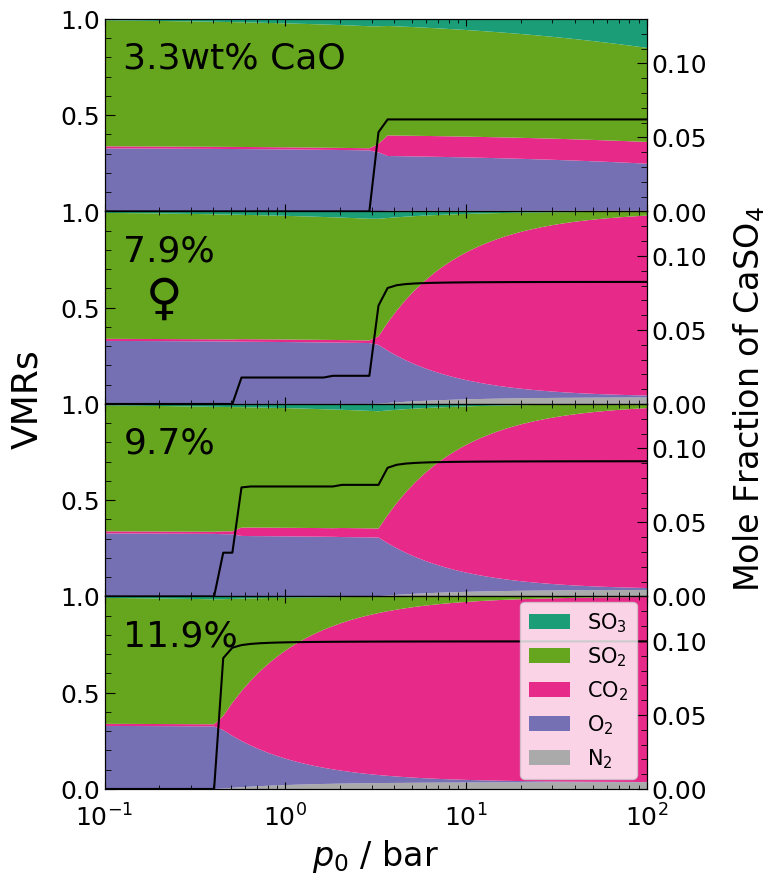

In [3]:
i_demo = np.argsort(CaO_massfracs)[:1].tolist() + [-1] + np.argsort(CaO_massfracs)[-2:].tolist()
title_list = [f'{CaO_massfracs[i_demo[0]]*100:.1f}wt% CaO']+\
    [f'{CaO_massfracs[i]*100:.1f}%' for i in i_demo[1:]]
fg = myutils.atm_demo(
    [dfs[i] for i in i_demo],
    title_list = title_list
)
fg.axes[1].annotate('♀', [.17,.47], fontsize=36)

fg.savefig('figures/Catransect.eps',format='eps',bbox_inches='tight', pad_inches=0)

### Mg

In [4]:
data_folder = '/data/ajnb3/results/summer/Mg_O_lines/'
csv_files = os.listdir(data_folder)
dfs = [pd.read_csv(f'{data_folder}/{csv_file}')
       for csv_file in csv_files]
MgO_massfracs = [myutils.MgO_mass_fraction(df).mean() for df in dfs]
venus_df = pd.read_csv(f'{data_folder}/../venus_1400.csv')
dfs.append(venus_df)
MgO_massfracs.append(myutils.MgO_mass_fraction(venus_df).mean())
dfs = [df for df, MgO_massfrac in zip(dfs, MgO_massfracs)
       if 0.03<MgO_massfrac<0.35]
MgO_massfracs = [MgO for MgO in MgO_massfracs
                 if 0.03<MgO<0.35]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


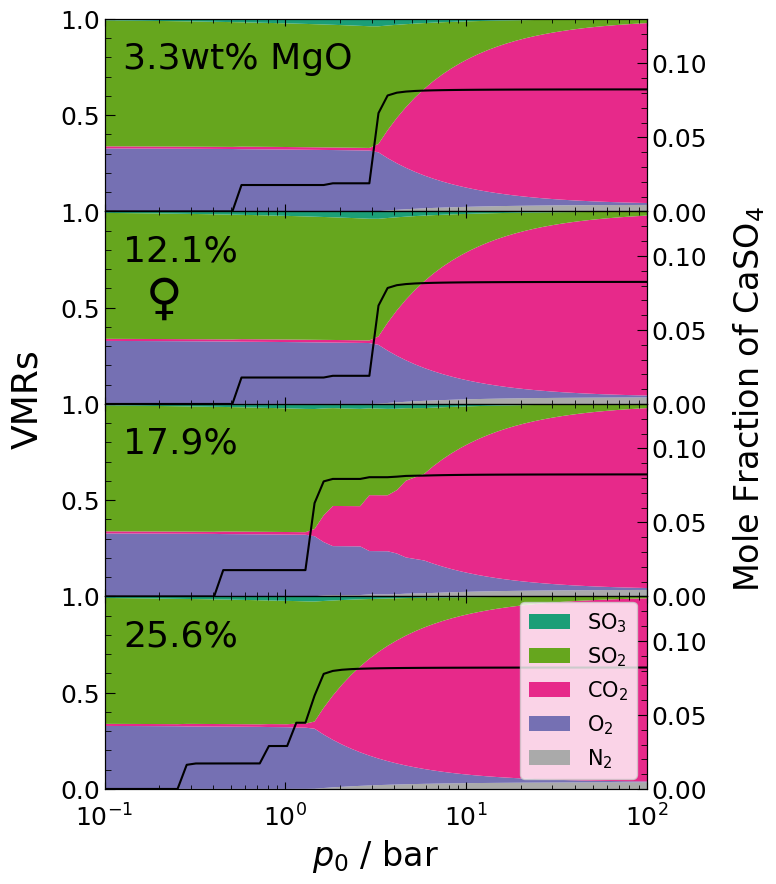

In [5]:
i_demo = np.argsort(MgO_massfracs)[:1].tolist() + [-1] + np.argsort(MgO_massfracs)[-2:].tolist()
i_demo = np.argsort(MgO_massfracs)
i_demo = [20, -1, 8, 9]
title_list = [f'{MgO_massfracs[i_demo[0]]*100:.1f}wt% MgO'] +\
    [f'{MgO_massfracs[i]*100:.1f}%' for i in i_demo[1:]]
fg = myutils.atm_demo(
    [dfs[i] for i in i_demo], title_list = title_list
)
fg.axes[1].annotate('♀', [.17,.47], fontsize=36)

fg.savefig('figures/Mgtransect.eps',format='eps',bbox_inches='tight', pad_inches=0)

### O

In [6]:
data_folder = '/data/ajnb3/results/summer/O_lines'
csv_files = [csv_file for csv_file in os.listdir(data_folder)]
dfs = [pd.read_csv(f'{data_folder}/{csv_file}')
       for csv_file in csv_files]
dfs = [df for df in dfs if len(df)==100]
log_fO295s = [myutils.log_f(df, 'O2').iloc[40]
              for df in dfs]
venus_df = pd.read_csv(f'/data/ajnb3/results/summer/venus_1400.csv')
dfs.append(venus_df)
log_fO295s.append(myutils.log_f(venus_df, 'O2').iloc[40])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


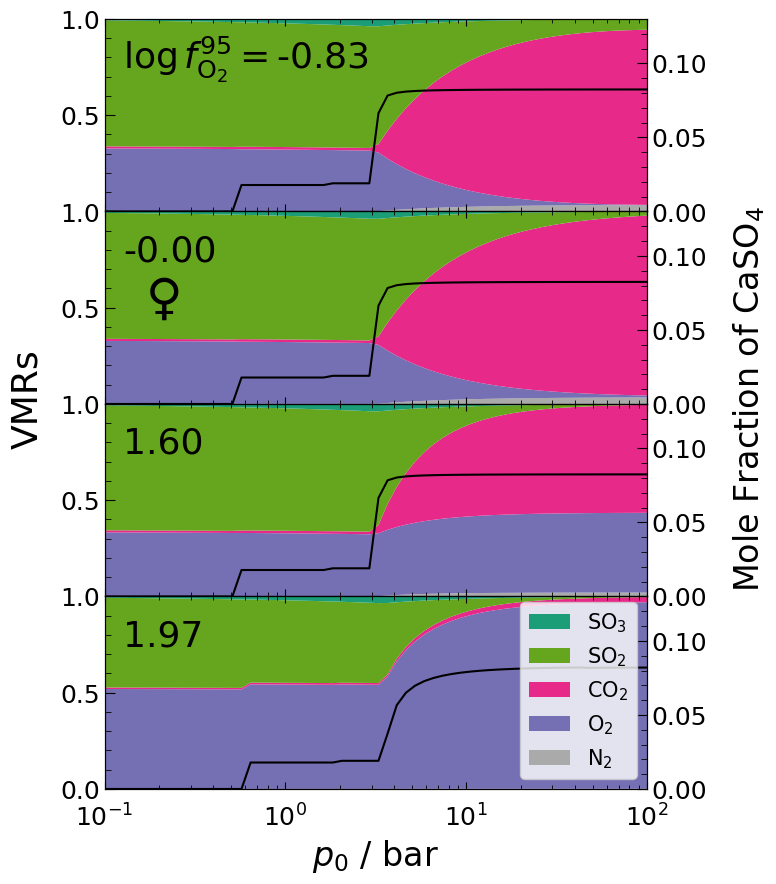

In [7]:
i_demo = [np.argsort(log_fO295s)[0], -1,
          np.argsort(log_fO295s)[20], np.argsort(log_fO295s)[-1]]
latex_string = r'$\log f_{\mathrm{O}_2}^{95} =$'
title_list = [
    rf"{latex_string}{log_fO295s[i_demo[0]]:.2f}"
]
title_list += [f'{log_fO295s[i]:.2f}' for i in i_demo[1:]]

fg = myutils.atm_demo([dfs[i] for i in i_demo], title_list)
fg.axes[1].annotate('♀', [.17,.47], fontsize=36)
fg.savefig('figures/Otransect.eps',format='eps',bbox_inches='tight', pad_inches=0)

### S

In [8]:
data_folder = '/data/ajnb3/results/summer/S_lines'
csv_files = [csv_file for csv_file in os.listdir(data_folder)]
dfs = [pd.read_csv(f'{data_folder}/{csv_file}')
       for csv_file in csv_files]
log_fS295s = [myutils.log_f(df, 'S2').iloc[40]
            for df in dfs]
venus_df = pd.read_csv(f'/data/ajnb3/results/summer/venus_1400.csv')
dfs.append(venus_df)
log_fS295s.append(myutils.log_f(venus_df, 'S2').iloc[40])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


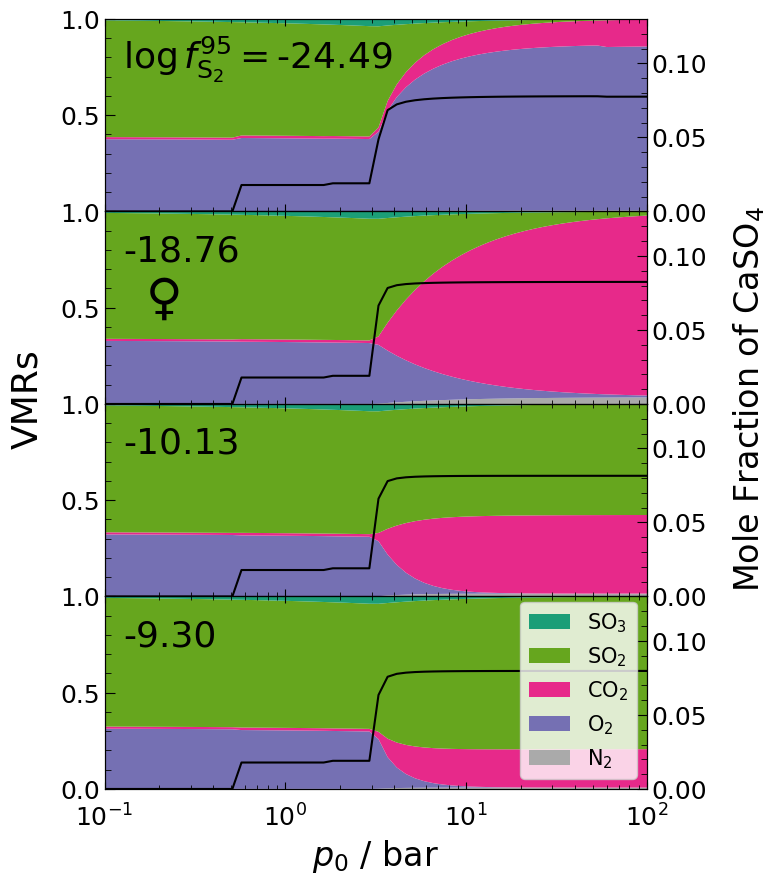

In [9]:
i_demo = [np.argsort(log_fS295s)[5], -1,
          np.argsort(log_fS295s)[27], np.argsort(log_fS295s)[-1]]
latex_string = r'$\log f_{\mathrm{S}_2}^{95} =$'
title_list = [
    rf"{latex_string}{log_fS295s[i_demo[0]]:.2f}"
]
title_list += [f'{log_fS295s[i]:.2f}' for i in i_demo[1:]]

fg = myutils.atm_demo([dfs[i] for i in i_demo], title_list)
fg.axes[1].annotate('♀', [.17,.47], fontsize=36)
fg.savefig('figures/Stransect.eps',format='eps',bbox_inches='tight', pad_inches=0)